In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.keras import layers, models, optimizers


## RNN 종류
---
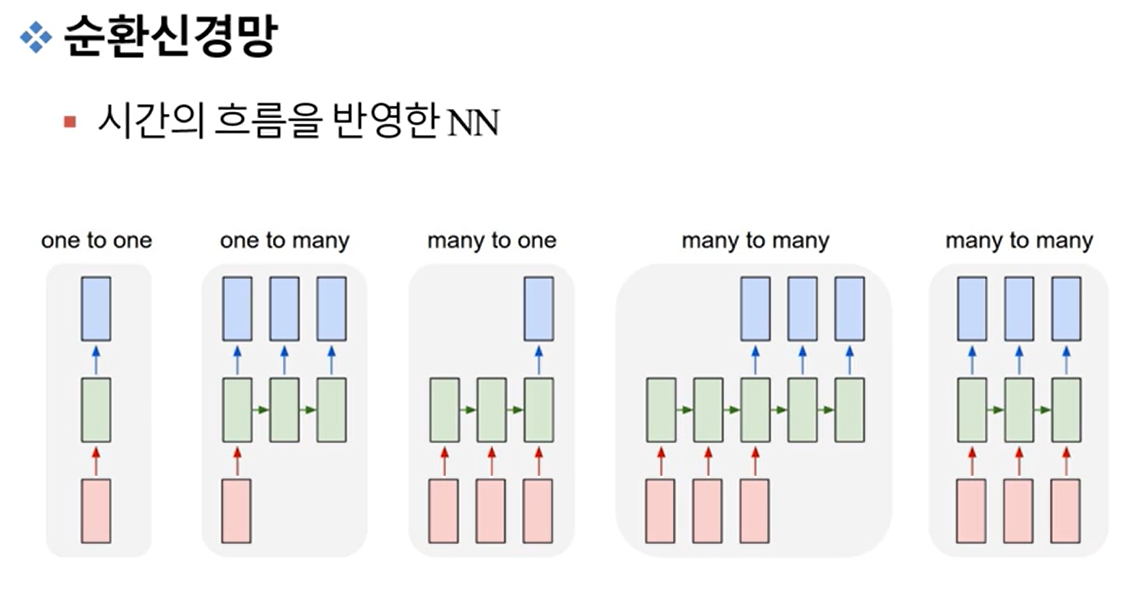

* one-to-one 은 MLP 와 동일하게 보아도 됨

(400,)


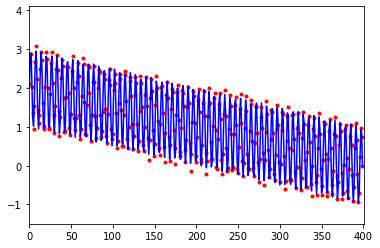

In [14]:
# 시계열 데이터 예측

# 가상 시계열 데이터 생성
# sinc graph 400개에 np.random.normal을 통해 noise 추가(평균:0, 표준편차: 1)
# 마지막으로 np.arragne(400) 을 더해주어서 점진적으로 증가하도록 만듦
# 따라서 데이터는 시간이 지날수록 상승하는 형태를 가지도록 구성
data_time =   np.sin(np.arange(400)) + np.random.normal(0, 0.1, 400) - np.arange(400)/200 + 2

print(data_time.shape)

plt.plot(data_time, 'r.')
plt.plot(range(400), np.sin(np.arange(400)) - np.arange(400)/200 + 2, 'b')
plt.xlim(-0.5, 400.5)
plt.ylim(-1.5, 4.1)
plt.show()

## MLP
* 이전 데이터 3개를 보고 다음 데이터를 예측하는 문제로 구성

In [15]:

data_matrix = []
# 이전 데이터 3개를 보기 위해 sequence_length = 3 으로 설정
seq_len = 3 

# sequence_length 로 묶어서 data_matrix를 구성
for i in range(0, len(data_time)-seq_len):
    tmp_data = data_time[i:i+seq_len+1]
    data_matrix.append(tmp_data)

data_matrix_np = np.array(data_matrix)
print(data_matrix_np.shape)
print(data_matrix_np)

(397, 4)
[[ 2.10791774e+00  2.70541235e+00  2.87276940e+00  2.03583423e+00]
 [ 2.70541235e+00  2.87276940e+00  2.03583423e+00  1.36290678e+00]
 [ 2.87276940e+00  2.03583423e+00  1.36290678e+00  9.42694866e-01]
 ...
 [-9.50683820e-01 -7.05370806e-01  2.23076872e-01  9.63413663e-01]
 [-7.05370806e-01  2.23076872e-01  9.63413663e-01  7.45193371e-01]
 [ 2.23076872e-01  9.63413663e-01  7.45193371e-01  1.57240383e-04]]


In [16]:
datax = data_matrix_np[:,0:3]
datay = data_matrix_np[:,3]

print(datax)
print(datax.shape)
print(datay.shape)

[[ 2.10791774  2.70541235  2.8727694 ]
 [ 2.70541235  2.8727694   2.03583423]
 [ 2.8727694   2.03583423  1.36290678]
 ...
 [-0.95068382 -0.70537081  0.22307687]
 [-0.70537081  0.22307687  0.96341366]
 [ 0.22307687  0.96341366  0.74519337]]
(397, 3)
(397,)


In [17]:
# Train Data와 Validation Data 분리
trnx = datax[0:300, :]
trny = datay[0:300]
tstx = datax[300:datax.shape[0],:]
tsty = datay[300:datax.shape[0]]
print(trnx.shape)
print(tstx.shape)
print(trny.shape)
print(tsty.shape)

(300, 3)
(97, 3)
(300,)
(97,)


In [18]:
input_shape = (3,) 

mlp_model = models.Sequential()
mlp_model.add(layers.Dense(units = 5, activation = 'tanh', input_shape = input_shape))
mlp_model.add(layers.Dense(units = 10, activation = 'tanh' ))
mlp_model.add(layers.Dense(units = 1, activation = 'linear'))

mlp_model.compile(optimizer="Adam", loss = "mean_squared_error", metrics = ['mean_squared_error'])


In [19]:
mlp_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5)                 20        
                                                                 
 dense_1 (Dense)             (None, 10)                60        
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 91
Trainable params: 91
Non-trainable params: 0
_________________________________________________________________


In [20]:
history = mlp_model.fit(trnx, trny, validation_data = [tstx, tsty], batch_size=10, epochs=300)

Epoch 1/300
30/30 [==============================] - 0s 6ms/step - loss: 2.6874 - mean_squared_error: 2.6874 - val_loss: 0.6259 - val_mean_squared_error: 0.6259
Epoch 2/300
30/30 [==============================] - 0s 2ms/step - loss: 1.6900 - mean_squared_error: 1.6900 - val_loss: 0.7924 - val_mean_squared_error: 0.7924
Epoch 3/300
30/30 [==============================] - 0s 2ms/step - loss: 1.1626 - mean_squared_error: 1.1626 - val_loss: 0.9264 - val_mean_squared_error: 0.9264
Epoch 4/300
30/30 [==============================] - 0s 2ms/step - loss: 0.8935 - mean_squared_error: 0.8935 - val_loss: 0.9701 - val_mean_squared_error: 0.9701
Epoch 5/300
30/30 [==============================] - 0s 2ms/step - loss: 0.7405 - mean_squared_error: 0.7405 - val_loss: 0.9323 - val_mean_squared_error: 0.9323
Epoch 6/300
30/30 [==============================] - 0s 2ms/step - loss: 0.6425 - mean_squared_error: 0.6425 - val_loss: 0.9061 - val_mean_squared_error: 0.9061
Epoch 7/300
30/30 [===============

30/30 [==============================] - 0s 1ms/step - loss: 0.0749 - mean_squared_error: 0.0749 - val_loss: 0.1093 - val_mean_squared_error: 0.1093
Epoch 52/300
30/30 [==============================] - 0s 1ms/step - loss: 0.0754 - mean_squared_error: 0.0754 - val_loss: 0.0885 - val_mean_squared_error: 0.0885
Epoch 53/300
30/30 [==============================] - 0s 2ms/step - loss: 0.0751 - mean_squared_error: 0.0751 - val_loss: 0.0930 - val_mean_squared_error: 0.0930
Epoch 54/300
30/30 [==============================] - 0s 1ms/step - loss: 0.0751 - mean_squared_error: 0.0751 - val_loss: 0.0779 - val_mean_squared_error: 0.0779
Epoch 55/300
30/30 [==============================] - 0s 1ms/step - loss: 0.0751 - mean_squared_error: 0.0751 - val_loss: 0.0859 - val_mean_squared_error: 0.0859
Epoch 56/300
30/30 [==============================] - 0s 1ms/step - loss: 0.0742 - mean_squared_error: 0.0742 - val_loss: 0.0870 - val_mean_squared_error: 0.0870
Epoch 57/300
30/30 [=====================

30/30 [==============================] - 0s 1ms/step - loss: 0.0741 - mean_squared_error: 0.0741 - val_loss: 0.0956 - val_mean_squared_error: 0.0956
Epoch 102/300
30/30 [==============================] - 0s 1ms/step - loss: 0.0756 - mean_squared_error: 0.0756 - val_loss: 0.0808 - val_mean_squared_error: 0.0808
Epoch 103/300
30/30 [==============================] - 0s 1ms/step - loss: 0.0738 - mean_squared_error: 0.0738 - val_loss: 0.0832 - val_mean_squared_error: 0.0832
Epoch 104/300
30/30 [==============================] - 0s 1ms/step - loss: 0.0717 - mean_squared_error: 0.0717 - val_loss: 0.0710 - val_mean_squared_error: 0.0710
Epoch 105/300
30/30 [==============================] - 0s 1ms/step - loss: 0.0754 - mean_squared_error: 0.0754 - val_loss: 0.0737 - val_mean_squared_error: 0.0737
Epoch 106/300
30/30 [==============================] - 0s 1ms/step - loss: 0.0731 - mean_squared_error: 0.0731 - val_loss: 0.0770 - val_mean_squared_error: 0.0770
Epoch 107/300
30/30 [===============

30/30 [==============================] - 0s 1ms/step - loss: 0.0720 - mean_squared_error: 0.0720 - val_loss: 0.0802 - val_mean_squared_error: 0.0802
Epoch 152/300
30/30 [==============================] - 0s 1ms/step - loss: 0.0717 - mean_squared_error: 0.0717 - val_loss: 0.0832 - val_mean_squared_error: 0.0832
Epoch 153/300
30/30 [==============================] - 0s 1ms/step - loss: 0.0718 - mean_squared_error: 0.0718 - val_loss: 0.0832 - val_mean_squared_error: 0.0832
Epoch 154/300
30/30 [==============================] - 0s 1ms/step - loss: 0.0723 - mean_squared_error: 0.0723 - val_loss: 0.0844 - val_mean_squared_error: 0.0844
Epoch 155/300
30/30 [==============================] - 0s 1ms/step - loss: 0.0722 - mean_squared_error: 0.0722 - val_loss: 0.0760 - val_mean_squared_error: 0.0760
Epoch 156/300
30/30 [==============================] - 0s 1ms/step - loss: 0.0719 - mean_squared_error: 0.0719 - val_loss: 0.0732 - val_mean_squared_error: 0.0732
Epoch 157/300
30/30 [===============

30/30 [==============================] - 0s 1ms/step - loss: 0.0712 - mean_squared_error: 0.0712 - val_loss: 0.0888 - val_mean_squared_error: 0.0888
Epoch 202/300
30/30 [==============================] - 0s 1ms/step - loss: 0.0721 - mean_squared_error: 0.0721 - val_loss: 0.0856 - val_mean_squared_error: 0.0856
Epoch 203/300
30/30 [==============================] - 0s 1ms/step - loss: 0.0716 - mean_squared_error: 0.0716 - val_loss: 0.0657 - val_mean_squared_error: 0.0657
Epoch 204/300
30/30 [==============================] - 0s 1ms/step - loss: 0.0727 - mean_squared_error: 0.0727 - val_loss: 0.0792 - val_mean_squared_error: 0.0792
Epoch 205/300
30/30 [==============================] - 0s 1ms/step - loss: 0.0704 - mean_squared_error: 0.0704 - val_loss: 0.0806 - val_mean_squared_error: 0.0806
Epoch 206/300
30/30 [==============================] - 0s 2ms/step - loss: 0.0706 - mean_squared_error: 0.0706 - val_loss: 0.0809 - val_mean_squared_error: 0.0809
Epoch 207/300
30/30 [===============

30/30 [==============================] - 0s 1ms/step - loss: 0.0696 - mean_squared_error: 0.0696 - val_loss: 0.0776 - val_mean_squared_error: 0.0776
Epoch 252/300
30/30 [==============================] - 0s 1ms/step - loss: 0.0695 - mean_squared_error: 0.0695 - val_loss: 0.0857 - val_mean_squared_error: 0.0857
Epoch 253/300
30/30 [==============================] - 0s 1ms/step - loss: 0.0707 - mean_squared_error: 0.0707 - val_loss: 0.0906 - val_mean_squared_error: 0.0906
Epoch 254/300
30/30 [==============================] - 0s 1ms/step - loss: 0.0698 - mean_squared_error: 0.0698 - val_loss: 0.0812 - val_mean_squared_error: 0.0812
Epoch 255/300
30/30 [==============================] - 0s 1ms/step - loss: 0.0694 - mean_squared_error: 0.0694 - val_loss: 0.0802 - val_mean_squared_error: 0.0802
Epoch 256/300
30/30 [==============================] - 0s 1ms/step - loss: 0.0691 - mean_squared_error: 0.0691 - val_loss: 0.0870 - val_mean_squared_error: 0.0870
Epoch 257/300
30/30 [===============

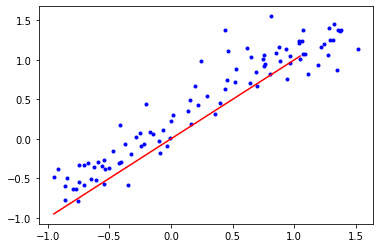

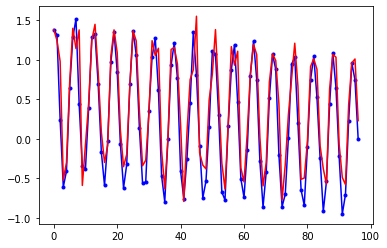

Final validation error is: %f 0.08373349905014038


In [21]:
plt.plot(tsty, mlp_model.predict(tstx),'b.')
plt.plot(np.arange(min(tsty), max(tsty)+ 0.5), np.arange(min(tsty), max(tsty)+0.5), 'r')
plt.show()

plt.plot(range(tsty.shape[0]),tsty, 'b.-')
plt.plot(range(tsty.shape[0]),mlp_model.predict(tstx), 'r-')
plt.show()

print("Final validation error is: %f", float(history.history['val_mean_squared_error'][len(history.history['val_mean_squared_error'])-1]))
#print("Final validation error is: %f" float() history.history['val_mean_squared_error'][len(history.history['val_mean_squared_error'])-1].astype(np.float32))

## RNN (Many-to-Many)
---

In [22]:
#Many-to-Many
batch_size = 10
sequence_length = 4
data_dim = 3

## input dimension 과 Sequence length
---
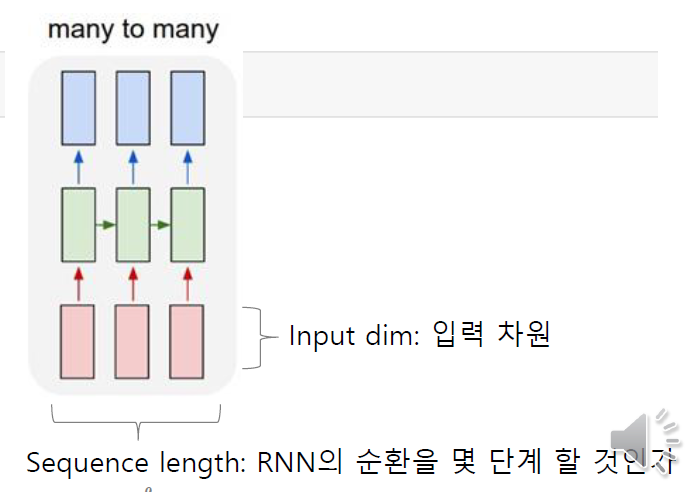

In [23]:
datax = data_matrix_np[0:data_matrix_np.shape[0]-1,0:3]
datay = data_matrix_np[0:data_matrix_np.shape[0]-1:,3]
print(datax.shape)
print(datay.shape)

(396, 3)
(396,)


In [24]:
datax = np.reshape(datax,(-1,sequence_length, data_dim))
datay = np.reshape(datay, (-1, sequence_length, 1))
print(datax.shape)
print(datay.shape)

(99, 4, 3)
(99, 4, 1)


In [25]:
trnx = datax[0:70, :]
trny = datay[0:70]
tstx = datax[70:datax.shape[0],:]
tsty = datax[70:datax.shape[0]]
print(trnx.shape)
print(tstx.shape)
print(trny.shape)
print(tsty.shape)

(70, 4, 3)
(29, 4, 3)
(70, 4, 1)
(29, 4, 3)


In [26]:
# 입력 텐서
input_shape = (datax[0].shape)
input_tensor = layers.Input(input_shape)
print(input_shape)

(4, 3)


In [27]:
rnn_layer = layers.LSTM(10,return_sequences=True)(input_tensor)
output_tensor = layers.TimeDistributed(layers.Dense(1,activation='linear'))(rnn_layer)

In [28]:
# model compile
model_mtom = models.Model(input_tensor, output_tensor)
model_mtom.compile(optimizer="Adam", loss='mean_squared_error',metrics=['mean_squared_error'])

In [29]:
model_mtom.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 4, 3)]            0         
                                                                 
 lstm (LSTM)                 (None, 4, 10)             560       
                                                                 
 time_distributed (TimeDistr  (None, 4, 1)             11        
 ibuted)                                                         
                                                                 
Total params: 571
Trainable params: 571
Non-trainable params: 0
_________________________________________________________________


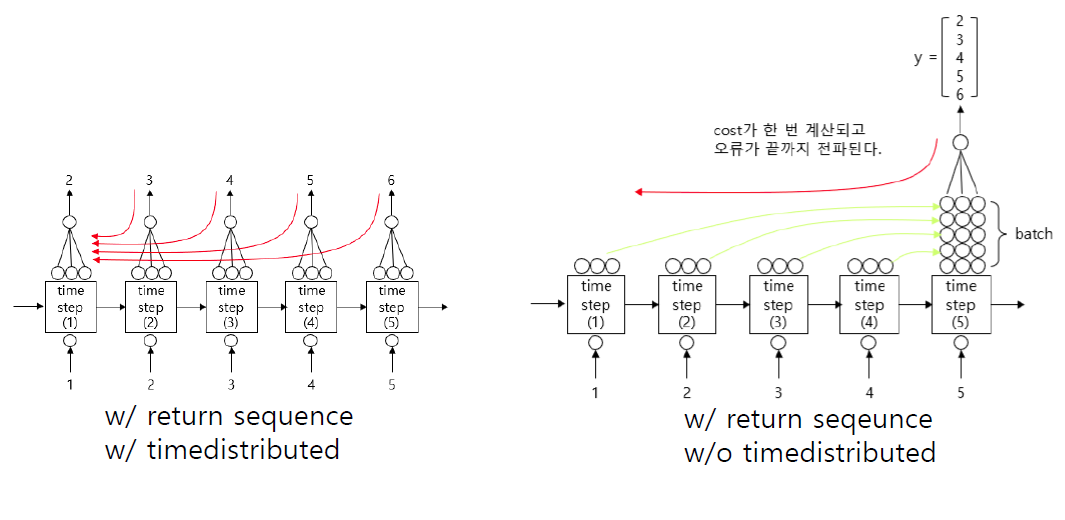

In [30]:
history = model_mtom.fit(trnx, trny, validation_data = [tstx, tsty], batch_size=10, epochs=300)

Epoch 1/300
7/7 [==============================] - 1s 53ms/step - loss: 3.0981 - mean_squared_error: 3.0981 - val_loss: 0.7865 - val_mean_squared_error: 0.7865
Epoch 2/300
7/7 [==============================] - 0s 6ms/step - loss: 2.8389 - mean_squared_error: 2.8389 - val_loss: 0.7376 - val_mean_squared_error: 0.7376
Epoch 3/300
7/7 [==============================] - 0s 6ms/step - loss: 2.6070 - mean_squared_error: 2.6070 - val_loss: 0.6943 - val_mean_squared_error: 0.6943
Epoch 4/300
7/7 [==============================] - 0s 5ms/step - loss: 2.3927 - mean_squared_error: 2.3927 - val_loss: 0.6569 - val_mean_squared_error: 0.6569
Epoch 5/300
7/7 [==============================] - 0s 4ms/step - loss: 2.2040 - mean_squared_error: 2.2040 - val_loss: 0.6245 - val_mean_squared_error: 0.6245
Epoch 6/300
7/7 [==============================] - 0s 5ms/step - loss: 2.0404 - mean_squared_error: 2.0404 - val_loss: 0.5963 - val_mean_squared_error: 0.5963
Epoch 7/300
7/7 [============================

7/7 [==============================] - 0s 5ms/step - loss: 0.6023 - mean_squared_error: 0.6023 - val_loss: 0.6574 - val_mean_squared_error: 0.6574
Epoch 53/300
7/7 [==============================] - 0s 5ms/step - loss: 0.5881 - mean_squared_error: 0.5881 - val_loss: 0.6642 - val_mean_squared_error: 0.6642
Epoch 54/300
7/7 [==============================] - 0s 5ms/step - loss: 0.5733 - mean_squared_error: 0.5733 - val_loss: 0.6697 - val_mean_squared_error: 0.6697
Epoch 55/300
7/7 [==============================] - 0s 5ms/step - loss: 0.5594 - mean_squared_error: 0.5594 - val_loss: 0.6735 - val_mean_squared_error: 0.6735
Epoch 56/300
7/7 [==============================] - 0s 5ms/step - loss: 0.5454 - mean_squared_error: 0.5454 - val_loss: 0.6834 - val_mean_squared_error: 0.6834
Epoch 57/300
7/7 [==============================] - 0s 5ms/step - loss: 0.5309 - mean_squared_error: 0.5309 - val_loss: 0.6932 - val_mean_squared_error: 0.6932
Epoch 58/300
7/7 [==============================] - 0

7/7 [==============================] - 0s 5ms/step - loss: 0.1874 - mean_squared_error: 0.1874 - val_loss: 0.8541 - val_mean_squared_error: 0.8541
Epoch 104/300
7/7 [==============================] - 0s 5ms/step - loss: 0.1837 - mean_squared_error: 0.1837 - val_loss: 0.8504 - val_mean_squared_error: 0.8504
Epoch 105/300
7/7 [==============================] - 0s 5ms/step - loss: 0.1804 - mean_squared_error: 0.1804 - val_loss: 0.8508 - val_mean_squared_error: 0.8508
Epoch 106/300
7/7 [==============================] - 0s 5ms/step - loss: 0.1775 - mean_squared_error: 0.1775 - val_loss: 0.8479 - val_mean_squared_error: 0.8479
Epoch 107/300
7/7 [==============================] - 0s 5ms/step - loss: 0.1737 - mean_squared_error: 0.1737 - val_loss: 0.8498 - val_mean_squared_error: 0.8498
Epoch 108/300
7/7 [==============================] - 0s 5ms/step - loss: 0.1706 - mean_squared_error: 0.1706 - val_loss: 0.8497 - val_mean_squared_error: 0.8497
Epoch 109/300
7/7 [=============================

Epoch 154/300
7/7 [==============================] - 0s 6ms/step - loss: 0.0992 - mean_squared_error: 0.0992 - val_loss: 0.9416 - val_mean_squared_error: 0.9416
Epoch 155/300
7/7 [==============================] - 0s 5ms/step - loss: 0.0986 - mean_squared_error: 0.0986 - val_loss: 0.9443 - val_mean_squared_error: 0.9443
Epoch 156/300
7/7 [==============================] - 0s 5ms/step - loss: 0.0981 - mean_squared_error: 0.0981 - val_loss: 0.9480 - val_mean_squared_error: 0.9480
Epoch 157/300
7/7 [==============================] - 0s 6ms/step - loss: 0.0974 - mean_squared_error: 0.0974 - val_loss: 0.9516 - val_mean_squared_error: 0.9516
Epoch 158/300
7/7 [==============================] - 0s 6ms/step - loss: 0.0969 - mean_squared_error: 0.0969 - val_loss: 0.9546 - val_mean_squared_error: 0.9546
Epoch 159/300
7/7 [==============================] - 0s 5ms/step - loss: 0.0964 - mean_squared_error: 0.0964 - val_loss: 0.9568 - val_mean_squared_error: 0.9568
Epoch 160/300
7/7 [===============

Epoch 205/300
7/7 [==============================] - 0s 5ms/step - loss: 0.0789 - mean_squared_error: 0.0789 - val_loss: 1.0415 - val_mean_squared_error: 1.0415
Epoch 206/300
7/7 [==============================] - 0s 5ms/step - loss: 0.0785 - mean_squared_error: 0.0785 - val_loss: 1.0437 - val_mean_squared_error: 1.0437
Epoch 207/300
7/7 [==============================] - 0s 5ms/step - loss: 0.0782 - mean_squared_error: 0.0782 - val_loss: 1.0441 - val_mean_squared_error: 1.0441
Epoch 208/300
7/7 [==============================] - 0s 6ms/step - loss: 0.0779 - mean_squared_error: 0.0779 - val_loss: 1.0452 - val_mean_squared_error: 1.0452
Epoch 209/300
7/7 [==============================] - 0s 6ms/step - loss: 0.0776 - mean_squared_error: 0.0776 - val_loss: 1.0470 - val_mean_squared_error: 1.0470
Epoch 210/300
7/7 [==============================] - 0s 5ms/step - loss: 0.0773 - mean_squared_error: 0.0773 - val_loss: 1.0475 - val_mean_squared_error: 1.0475
Epoch 211/300
7/7 [===============

Epoch 256/300
7/7 [==============================] - 0s 5ms/step - loss: 0.0663 - mean_squared_error: 0.0663 - val_loss: 1.0754 - val_mean_squared_error: 1.0754
Epoch 257/300
7/7 [==============================] - 0s 5ms/step - loss: 0.0663 - mean_squared_error: 0.0663 - val_loss: 1.0786 - val_mean_squared_error: 1.0786
Epoch 258/300
7/7 [==============================] - 0s 5ms/step - loss: 0.0657 - mean_squared_error: 0.0657 - val_loss: 1.0777 - val_mean_squared_error: 1.0777
Epoch 259/300
7/7 [==============================] - 0s 5ms/step - loss: 0.0656 - mean_squared_error: 0.0656 - val_loss: 1.0779 - val_mean_squared_error: 1.0779
Epoch 260/300
7/7 [==============================] - 0s 5ms/step - loss: 0.0655 - mean_squared_error: 0.0655 - val_loss: 1.0767 - val_mean_squared_error: 1.0767
Epoch 261/300
7/7 [==============================] - 0s 6ms/step - loss: 0.0653 - mean_squared_error: 0.0653 - val_loss: 1.0766 - val_mean_squared_error: 1.0766
Epoch 262/300
7/7 [===============

In [31]:
"""
tmp = np.reshape(tsty, (-1,3))
plt.plot(tmp, np.reshape(model_mtom.predict(tstx), (-1,1)),'b.')
plt.plot(np.arange(min(tmp), max(tmp)+ 0.5), np.arange(min(tmp), max(tmp)+0.5), 'r')
plt.show()

plt.plot(range(tmp.shape[0]),tmp, 'b.-')
plt.plot(range(tmp.shape[0]),np.reshape(model_mtom.predict(tstx), (-1,1)), 'r-')
plt.show()

print("Final validation error is: %f", float(history.history['val_mean_squared_error'][len(history.history['val_mean_squared_error'])-1]))
"""

'\ntmp = np.reshape(tsty, (-1,3))\nplt.plot(tmp, np.reshape(model_mtom.predict(tstx), (-1,1)),\'b.\')\nplt.plot(np.arange(min(tmp), max(tmp)+ 0.5), np.arange(min(tmp), max(tmp)+0.5), \'r\')\nplt.show()\n\nplt.plot(range(tmp.shape[0]),tmp, \'b.-\')\nplt.plot(range(tmp.shape[0]),np.reshape(model_mtom.predict(tstx), (-1,1)), \'r-\')\nplt.show()\n\nprint("Final validation error is: %f", float(history.history[\'val_mean_squared_error\'][len(history.history[\'val_mean_squared_error\'])-1]))\n'

## Many-to-One
---

In [32]:
data_time.shape

(400,)

In [33]:
data_matrix = []
seq_len = 4
for i in range(0, len(data_time)-data_dim*seq_len):
    tmp_data = data_time[i:i+data_dim*seq_len+1]
    data_matrix.append(tmp_data)

data_matrix_np = np.array(data_matrix)
print(data_matrix_np.shape)
print(data_matrix_np)


(388, 13)
[[ 2.10791774e+00  2.70541235e+00  2.87276940e+00 ...  1.43998057e+00
   1.08497268e+00  1.30227468e+00]
 [ 2.70541235e+00  2.87276940e+00  2.03583423e+00 ...  1.08497268e+00
   1.30227468e+00  2.47603299e+00]
 [ 2.87276940e+00  2.03583423e+00  1.36290678e+00 ...  1.30227468e+00
   2.47603299e+00  2.92180975e+00]
 ...
 [ 1.04810499e+00  5.26077388e-01 -2.46021985e-01 ... -7.05370806e-01
   2.23076872e-01  9.63413663e-01]
 [ 5.26077388e-01 -2.46021985e-01 -9.18107821e-01 ...  2.23076872e-01
   9.63413663e-01  7.45193371e-01]
 [-2.46021985e-01 -9.18107821e-01 -5.39980107e-01 ...  9.63413663e-01
   7.45193371e-01  1.57240383e-04]]


In [34]:
datax = data_matrix_np[0:data_matrix_np.shape[0]-1,0:12]
datay = data_matrix_np[0:data_matrix_np.shape[0]-1:, 12]
print(datax.shape)
print(datay.shape)


(387, 12)
(387,)


In [35]:
datax = np.reshape(datax,(-1, seq_len,data_dim))
print(datax.shape)
print(datay.shape)

(387, 4, 3)
(387,)


In [36]:
trnx = datax[0:300, :]
trny = datay[0:300]
tstx = datax[300:datax.shape[0],:]
tsty = datay[300:datax.shape[0]]
print(trnx.shape)
print(tstx.shape)
print(trny.shape)
print(tsty.shape)

(300, 4, 3)
(87, 4, 3)
(300,)
(87,)


In [37]:
input_shape = (trnx[0].shape)
input_tensor = layers.Input(input_shape)

In [38]:
rnn_layer = layers.LSTM(10)(input_tensor)
output_tensor = layers.Dense(1, activation="linear")(rnn_layer)

In [39]:
model_mto = models.Model(input_tensor, output_tensor)
model_mto.compile(optimizer = 'Adam', loss='mean_squared_error', metrics=['mean_squared_error'])

In [40]:
model_mto.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 4, 3)]            0         
                                                                 
 lstm_1 (LSTM)               (None, 10)                560       
                                                                 
 dense_4 (Dense)             (None, 1)                 11        
                                                                 
Total params: 571
Trainable params: 571
Non-trainable params: 0
_________________________________________________________________


In [41]:
history = model_mto.fit(trnx, trny, validation_data = [tstx, tsty], batch_size=10, epochs=300)

Epoch 1/300
30/30 [==============================] - 1s 12ms/step - loss: 0.7793 - mean_squared_error: 0.7793 - val_loss: 0.5970 - val_mean_squared_error: 0.5970
Epoch 2/300
30/30 [==============================] - 0s 3ms/step - loss: 0.6132 - mean_squared_error: 0.6132 - val_loss: 0.6194 - val_mean_squared_error: 0.6194
Epoch 3/300
30/30 [==============================] - 0s 2ms/step - loss: 0.5665 - mean_squared_error: 0.5665 - val_loss: 0.5913 - val_mean_squared_error: 0.5913
Epoch 4/300
30/30 [==============================] - 0s 2ms/step - loss: 0.5268 - mean_squared_error: 0.5268 - val_loss: 0.5548 - val_mean_squared_error: 0.5548
Epoch 5/300
30/30 [==============================] - 0s 3ms/step - loss: 0.4754 - mean_squared_error: 0.4754 - val_loss: 0.5201 - val_mean_squared_error: 0.5201
Epoch 6/300
30/30 [==============================] - 0s 2ms/step - loss: 0.4145 - mean_squared_error: 0.4145 - val_loss: 0.4761 - val_mean_squared_error: 0.4761
Epoch 7/300
30/30 [==============

30/30 [==============================] - 0s 2ms/step - loss: 0.0166 - mean_squared_error: 0.0166 - val_loss: 0.0753 - val_mean_squared_error: 0.0753
Epoch 52/300
30/30 [==============================] - 0s 2ms/step - loss: 0.0159 - mean_squared_error: 0.0159 - val_loss: 0.0734 - val_mean_squared_error: 0.0734
Epoch 53/300
30/30 [==============================] - 0s 2ms/step - loss: 0.0155 - mean_squared_error: 0.0155 - val_loss: 0.0761 - val_mean_squared_error: 0.0761
Epoch 54/300
30/30 [==============================] - 0s 2ms/step - loss: 0.0158 - mean_squared_error: 0.0158 - val_loss: 0.0723 - val_mean_squared_error: 0.0723
Epoch 55/300
30/30 [==============================] - 0s 2ms/step - loss: 0.0159 - mean_squared_error: 0.0159 - val_loss: 0.0693 - val_mean_squared_error: 0.0693
Epoch 56/300
30/30 [==============================] - 0s 2ms/step - loss: 0.0154 - mean_squared_error: 0.0154 - val_loss: 0.0704 - val_mean_squared_error: 0.0704
Epoch 57/300
30/30 [=====================

30/30 [==============================] - 0s 2ms/step - loss: 0.0126 - mean_squared_error: 0.0126 - val_loss: 0.0383 - val_mean_squared_error: 0.0383
Epoch 102/300
30/30 [==============================] - 0s 2ms/step - loss: 0.0128 - mean_squared_error: 0.0128 - val_loss: 0.0377 - val_mean_squared_error: 0.0377
Epoch 103/300
30/30 [==============================] - 0s 2ms/step - loss: 0.0131 - mean_squared_error: 0.0131 - val_loss: 0.0364 - val_mean_squared_error: 0.0364
Epoch 104/300
30/30 [==============================] - 0s 2ms/step - loss: 0.0129 - mean_squared_error: 0.0129 - val_loss: 0.0362 - val_mean_squared_error: 0.0362
Epoch 105/300
30/30 [==============================] - 0s 2ms/step - loss: 0.0126 - mean_squared_error: 0.0126 - val_loss: 0.0363 - val_mean_squared_error: 0.0363
Epoch 106/300
30/30 [==============================] - 0s 2ms/step - loss: 0.0124 - mean_squared_error: 0.0124 - val_loss: 0.0362 - val_mean_squared_error: 0.0362
Epoch 107/300
30/30 [===============

30/30 [==============================] - 0s 2ms/step - loss: 0.0117 - mean_squared_error: 0.0117 - val_loss: 0.0271 - val_mean_squared_error: 0.0271
Epoch 152/300
30/30 [==============================] - 0s 2ms/step - loss: 0.0119 - mean_squared_error: 0.0119 - val_loss: 0.0271 - val_mean_squared_error: 0.0271
Epoch 153/300
30/30 [==============================] - 0s 3ms/step - loss: 0.0115 - mean_squared_error: 0.0115 - val_loss: 0.0267 - val_mean_squared_error: 0.0267
Epoch 154/300
30/30 [==============================] - 0s 2ms/step - loss: 0.0117 - mean_squared_error: 0.0117 - val_loss: 0.0270 - val_mean_squared_error: 0.0270
Epoch 155/300
30/30 [==============================] - 0s 2ms/step - loss: 0.0115 - mean_squared_error: 0.0115 - val_loss: 0.0266 - val_mean_squared_error: 0.0266
Epoch 156/300
30/30 [==============================] - 0s 2ms/step - loss: 0.0121 - mean_squared_error: 0.0121 - val_loss: 0.0272 - val_mean_squared_error: 0.0272
Epoch 157/300
30/30 [===============

30/30 [==============================] - 0s 2ms/step - loss: 0.0111 - mean_squared_error: 0.0111 - val_loss: 0.0242 - val_mean_squared_error: 0.0242
Epoch 202/300
30/30 [==============================] - 0s 2ms/step - loss: 0.0110 - mean_squared_error: 0.0110 - val_loss: 0.0250 - val_mean_squared_error: 0.0250
Epoch 203/300
30/30 [==============================] - 0s 2ms/step - loss: 0.0121 - mean_squared_error: 0.0121 - val_loss: 0.0252 - val_mean_squared_error: 0.0252
Epoch 204/300
30/30 [==============================] - 0s 2ms/step - loss: 0.0111 - mean_squared_error: 0.0111 - val_loss: 0.0251 - val_mean_squared_error: 0.0251
Epoch 205/300
30/30 [==============================] - 0s 2ms/step - loss: 0.0116 - mean_squared_error: 0.0116 - val_loss: 0.0256 - val_mean_squared_error: 0.0256
Epoch 206/300
30/30 [==============================] - 0s 2ms/step - loss: 0.0109 - mean_squared_error: 0.0109 - val_loss: 0.0244 - val_mean_squared_error: 0.0244
Epoch 207/300
30/30 [===============

30/30 [==============================] - 0s 2ms/step - loss: 0.0110 - mean_squared_error: 0.0110 - val_loss: 0.0260 - val_mean_squared_error: 0.0260
Epoch 252/300
30/30 [==============================] - 0s 3ms/step - loss: 0.0111 - mean_squared_error: 0.0111 - val_loss: 0.0275 - val_mean_squared_error: 0.0275
Epoch 253/300
30/30 [==============================] - 0s 2ms/step - loss: 0.0112 - mean_squared_error: 0.0112 - val_loss: 0.0261 - val_mean_squared_error: 0.0261
Epoch 254/300
30/30 [==============================] - 0s 2ms/step - loss: 0.0108 - mean_squared_error: 0.0108 - val_loss: 0.0260 - val_mean_squared_error: 0.0260
Epoch 255/300
30/30 [==============================] - 0s 2ms/step - loss: 0.0116 - mean_squared_error: 0.0116 - val_loss: 0.0259 - val_mean_squared_error: 0.0259
Epoch 256/300
30/30 [==============================] - 0s 2ms/step - loss: 0.0110 - mean_squared_error: 0.0110 - val_loss: 0.0265 - val_mean_squared_error: 0.0265
Epoch 257/300
30/30 [===============

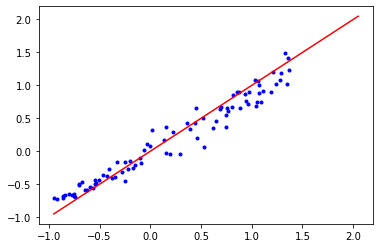

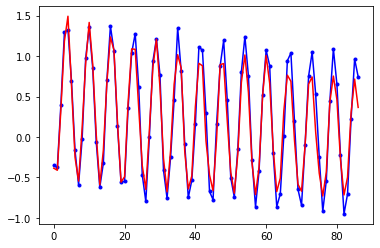

Final validation error is: %f 0.028683029115200043


In [42]:
plt.plot(tsty, model_mto.predict(tstx),'b.')
plt.plot(np.arange(min(tsty), max(tsty)+ 1), np.arange(min(tsty), max(tsty)+1), 'r')
plt.show()

plt.plot(range(tsty.shape[0]),tsty, 'b.-')
plt.plot(range(tsty.shape[0]),model_mto.predict(tstx), 'r-')
plt.show()

print("Final validation error is: %f", float(history.history['val_mean_squared_error'][len(history.history['val_mean_squared_error'])-1]))


# Bidirectional

In [43]:
input_shape=(trnx[0].shape)
input_tensor=layers.Input(input_shape)

rnn_layer = layers.Bidirectional(layers.LSTM(10), merge_mode = 'concat')(input_tensor)
output_tensor = layers.Dense(1, activation="linear")(rnn_layer)

model_bidirectional = models.Model(input_tensor, output_tensor)
model_bidirectional.compile(optimizer = "Adam", loss = 'mean_squared_error',metrics = ['mean_squared_error'])
model_bidirectional.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 4, 3)]            0         
                                                                 
 bidirectional (Bidirectiona  (None, 20)               1120      
 l)                                                              
                                                                 
 dense_5 (Dense)             (None, 1)                 21        
                                                                 
Total params: 1,141
Trainable params: 1,141
Non-trainable params: 0
_________________________________________________________________


In [44]:
history = model_mto.fit(trnx, trny, validation_data = [tstx, tsty], batch_size=10, epochs=300)

Epoch 1/300
30/30 [==============================] - 0s 3ms/step - loss: 0.0104 - mean_squared_error: 0.0104 - val_loss: 0.0296 - val_mean_squared_error: 0.0296
Epoch 2/300
30/30 [==============================] - 0s 2ms/step - loss: 0.0107 - mean_squared_error: 0.0107 - val_loss: 0.0301 - val_mean_squared_error: 0.0301
Epoch 3/300
30/30 [==============================] - 0s 2ms/step - loss: 0.0106 - mean_squared_error: 0.0106 - val_loss: 0.0297 - val_mean_squared_error: 0.0297
Epoch 4/300
30/30 [==============================] - 0s 3ms/step - loss: 0.0106 - mean_squared_error: 0.0106 - val_loss: 0.0291 - val_mean_squared_error: 0.0291
Epoch 5/300
30/30 [==============================] - 0s 3ms/step - loss: 0.0104 - mean_squared_error: 0.0104 - val_loss: 0.0291 - val_mean_squared_error: 0.0291
Epoch 6/300
30/30 [==============================] - 0s 3ms/step - loss: 0.0108 - mean_squared_error: 0.0108 - val_loss: 0.0288 - val_mean_squared_error: 0.0288
Epoch 7/300
30/30 [===============

30/30 [==============================] - 0s 3ms/step - loss: 0.0101 - mean_squared_error: 0.0101 - val_loss: 0.0319 - val_mean_squared_error: 0.0319
Epoch 52/300
30/30 [==============================] - 0s 2ms/step - loss: 0.0105 - mean_squared_error: 0.0105 - val_loss: 0.0321 - val_mean_squared_error: 0.0321
Epoch 53/300
30/30 [==============================] - 0s 2ms/step - loss: 0.0102 - mean_squared_error: 0.0102 - val_loss: 0.0330 - val_mean_squared_error: 0.0330
Epoch 54/300
30/30 [==============================] - 0s 2ms/step - loss: 0.0101 - mean_squared_error: 0.0101 - val_loss: 0.0318 - val_mean_squared_error: 0.0318
Epoch 55/300
30/30 [==============================] - 0s 2ms/step - loss: 0.0101 - mean_squared_error: 0.0101 - val_loss: 0.0328 - val_mean_squared_error: 0.0328
Epoch 56/300
30/30 [==============================] - 0s 2ms/step - loss: 0.0104 - mean_squared_error: 0.0104 - val_loss: 0.0328 - val_mean_squared_error: 0.0328
Epoch 57/300
30/30 [=====================

30/30 [==============================] - 0s 3ms/step - loss: 0.0101 - mean_squared_error: 0.0101 - val_loss: 0.0366 - val_mean_squared_error: 0.0366
Epoch 102/300
30/30 [==============================] - 0s 2ms/step - loss: 0.0109 - mean_squared_error: 0.0109 - val_loss: 0.0366 - val_mean_squared_error: 0.0366
Epoch 103/300
30/30 [==============================] - 0s 2ms/step - loss: 0.0100 - mean_squared_error: 0.0100 - val_loss: 0.0370 - val_mean_squared_error: 0.0370
Epoch 104/300
30/30 [==============================] - 0s 2ms/step - loss: 0.0099 - mean_squared_error: 0.0099 - val_loss: 0.0365 - val_mean_squared_error: 0.0365
Epoch 105/300
30/30 [==============================] - 0s 3ms/step - loss: 0.0098 - mean_squared_error: 0.0098 - val_loss: 0.0370 - val_mean_squared_error: 0.0370
Epoch 106/300
30/30 [==============================] - 0s 2ms/step - loss: 0.0100 - mean_squared_error: 0.0100 - val_loss: 0.0356 - val_mean_squared_error: 0.0356
Epoch 107/300
30/30 [===============

30/30 [==============================] - 0s 2ms/step - loss: 0.0099 - mean_squared_error: 0.0099 - val_loss: 0.0423 - val_mean_squared_error: 0.0423
Epoch 152/300
30/30 [==============================] - 0s 3ms/step - loss: 0.0098 - mean_squared_error: 0.0098 - val_loss: 0.0421 - val_mean_squared_error: 0.0421
Epoch 153/300
30/30 [==============================] - 0s 2ms/step - loss: 0.0099 - mean_squared_error: 0.0099 - val_loss: 0.0439 - val_mean_squared_error: 0.0439
Epoch 154/300
30/30 [==============================] - 0s 2ms/step - loss: 0.0102 - mean_squared_error: 0.0102 - val_loss: 0.0430 - val_mean_squared_error: 0.0430
Epoch 155/300
30/30 [==============================] - 0s 2ms/step - loss: 0.0098 - mean_squared_error: 0.0098 - val_loss: 0.0431 - val_mean_squared_error: 0.0431
Epoch 156/300
30/30 [==============================] - 0s 2ms/step - loss: 0.0102 - mean_squared_error: 0.0102 - val_loss: 0.0435 - val_mean_squared_error: 0.0435
Epoch 157/300
30/30 [===============

30/30 [==============================] - 0s 2ms/step - loss: 0.0095 - mean_squared_error: 0.0095 - val_loss: 0.0499 - val_mean_squared_error: 0.0499
Epoch 202/300
30/30 [==============================] - 0s 2ms/step - loss: 0.0096 - mean_squared_error: 0.0096 - val_loss: 0.0496 - val_mean_squared_error: 0.0496
Epoch 203/300
30/30 [==============================] - 0s 2ms/step - loss: 0.0095 - mean_squared_error: 0.0095 - val_loss: 0.0504 - val_mean_squared_error: 0.0504
Epoch 204/300
30/30 [==============================] - 0s 3ms/step - loss: 0.0094 - mean_squared_error: 0.0094 - val_loss: 0.0496 - val_mean_squared_error: 0.0496
Epoch 205/300
30/30 [==============================] - 0s 2ms/step - loss: 0.0095 - mean_squared_error: 0.0095 - val_loss: 0.0491 - val_mean_squared_error: 0.0491
Epoch 206/300
30/30 [==============================] - 0s 2ms/step - loss: 0.0095 - mean_squared_error: 0.0095 - val_loss: 0.0512 - val_mean_squared_error: 0.0512
Epoch 207/300
30/30 [===============

30/30 [==============================] - 0s 2ms/step - loss: 0.0096 - mean_squared_error: 0.0096 - val_loss: 0.0609 - val_mean_squared_error: 0.0609
Epoch 252/300
30/30 [==============================] - 0s 2ms/step - loss: 0.0094 - mean_squared_error: 0.0094 - val_loss: 0.0631 - val_mean_squared_error: 0.0631
Epoch 253/300
30/30 [==============================] - 0s 2ms/step - loss: 0.0092 - mean_squared_error: 0.0092 - val_loss: 0.0641 - val_mean_squared_error: 0.0641
Epoch 254/300
30/30 [==============================] - 0s 2ms/step - loss: 0.0093 - mean_squared_error: 0.0093 - val_loss: 0.0617 - val_mean_squared_error: 0.0617
Epoch 255/300
30/30 [==============================] - 0s 2ms/step - loss: 0.0098 - mean_squared_error: 0.0098 - val_loss: 0.0624 - val_mean_squared_error: 0.0624
Epoch 256/300
30/30 [==============================] - 0s 2ms/step - loss: 0.0096 - mean_squared_error: 0.0096 - val_loss: 0.0642 - val_mean_squared_error: 0.0642
Epoch 257/300
30/30 [===============

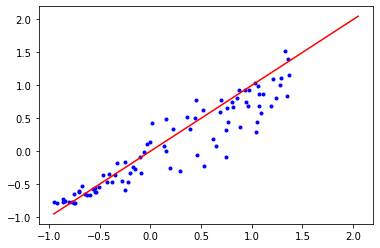

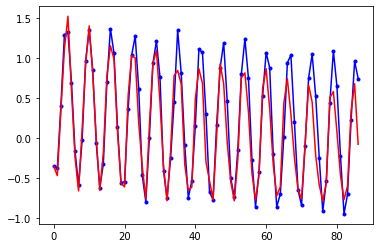

Final validation error is: %f 0.07643186300992966


In [45]:
plt.plot(tsty, model_mto.predict(tstx),'b.')
plt.plot(np.arange(min(tsty), max(tsty)+ 1), np.arange(min(tsty), max(tsty)+1), 'r')
plt.show()

plt.plot(range(tsty.shape[0]),tsty, 'b.-')
plt.plot(range(tsty.shape[0]),model_mto.predict(tstx), 'r-')
plt.show()

print("Final validation error is: %f", float(history.history['val_mean_squared_error'][len(history.history['val_mean_squared_error'])-1]))
